<a href="https://colab.research.google.com/github/FelipeBuonoEvangelista/An-lise-Descritiva-Explorat-ria-e-Preditiva-de-um-banco-de-dados-de-vendas/blob/main/Desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
#Bibliotecas usadas
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Base de dados para a análise

url = "https://drive.google.com/uc?id=1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n"
df = pd.read_csv(url, engine="python")

In [58]:
#Visualizando os Dados
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


#Análise Descritiva

1. Análise Descrtiva utilizando o describe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

2. Visualisando um Histograma para visualisar a distribuição das variáveis https://matplotlib.org/stable/gallery/statistics/hist.html

3. Visualisando Gráficos de dispersão para relação entre investimentos e vendas https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [60]:
# 1. Criando uma Análise Descritiva dos Dados
descricao = df.describe()
print(descricao)

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


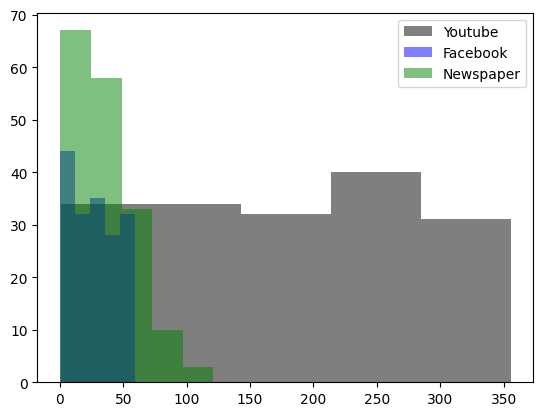

In [72]:
#2. Histograma para Visualisar as variáveis distribuidas
plt.hist(df['youtube'], bins=5, alpha=0.5, label='Youtube', color='black')
plt.hist(df['facebook'], bins=5, alpha=0.5, label='Facebook', color='blue')
plt.hist(df['newspaper'], bins=5, alpha=0.5, label='Newspaper',color='green')
plt.legend(loc='upper right')
plt.show()

#Nota:
O número de Investimentos no Facebook é menor se comparado aos outros itens

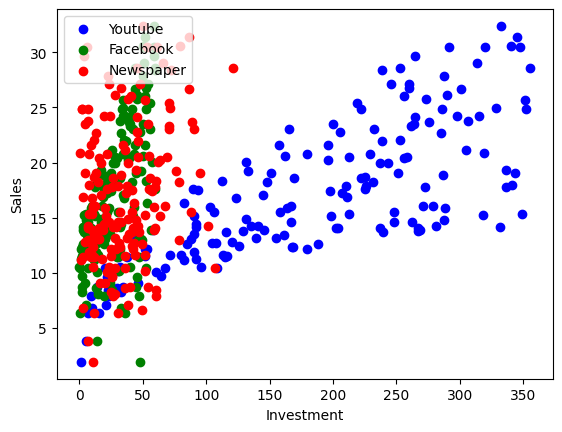

In [64]:
# 3. Gráfico de dispersão para comparar o investimento com as vendas
plt.scatter(df['youtube'], df['sales'], color='blue', label='Youtube')
plt.scatter(df['facebook'], df['sales'], color='green', label='Facebook')
plt.scatter(df['newspaper'], df['sales'], color='red', label='Newspaper')
plt.xlabel('Investment')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#Nota:
O Youtube demanda um alto nível de investimento para alcançar bons resutados, enquanto o facebook e o jornal atendem isso com um número menor de dinheiro gasto

#Análise Exploratória

1.   Análise exploratória mostrando um histograma de todos os investimentos citados e também das vendas, sendo utilizado o Matplotlib.figure https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
2.   Análise exploratória mostrando a relação entre os investimentos em publicidade e as vendas, sendo utilizado o Matplotlib.figure https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html



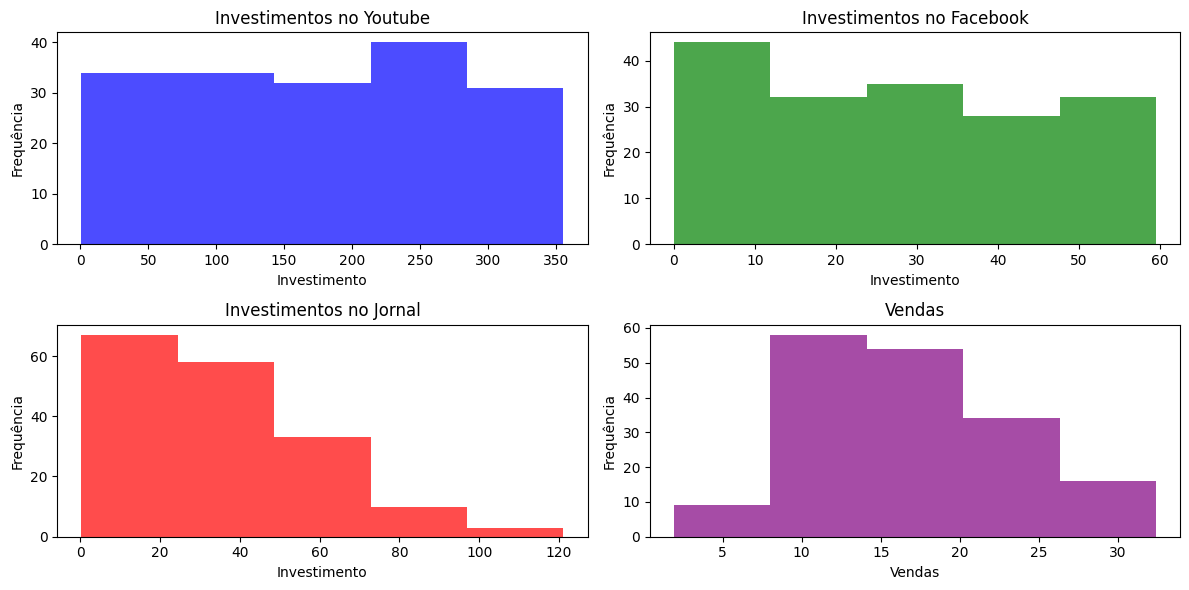

In [73]:
# Histograma dos investimentos
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['youtube'], bins=5, color='blue', alpha=0.7)
plt.title('Investimentos no Youtube')
plt.xlabel('Investimento')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
plt.hist(df['facebook'], bins=5, color='green', alpha=0.7)
plt.title('Investimentos no Facebook')
plt.xlabel('Investimento')
plt.ylabel('Frequência')

plt.subplot(2, 2, 3)
plt.hist(df['newspaper'], bins=5, color='red', alpha=0.7)
plt.title('Investimentos no Jornal')
plt.xlabel('Investimento')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
plt.hist(df['sales'], bins=5, color='purple', alpha=0.7)
plt.title('Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

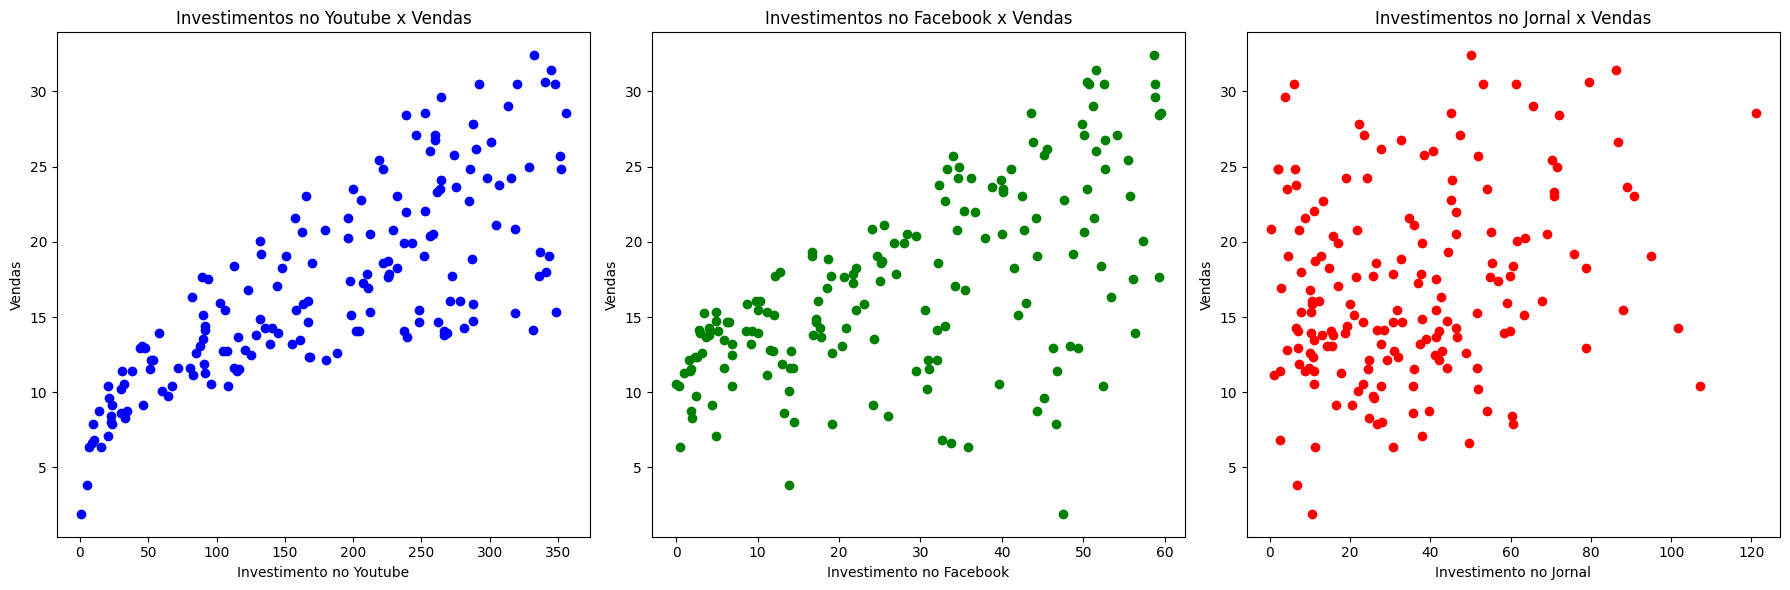

In [75]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['youtube'], df['sales'], color='blue')
plt.title('Investimentos no Youtube x Vendas')
plt.xlabel('Investimento no Youtube')
plt.ylabel('Vendas')

plt.subplot(1, 3, 2)
plt.scatter(df['facebook'], df['sales'], color='green')
plt.title('Investimentos no Facebook x Vendas')
plt.xlabel('Investimento no Facebook')
plt.ylabel('Vendas')

plt.subplot(1, 3, 3)
plt.scatter(df['newspaper'], df['sales'], color='red')
plt.title('Investimentos no Jornal x Vendas')
plt.xlabel('Investimento no Jornal')
plt.ylabel('Vendas')

plt.tight_layout()
plt.show()

#Nota:
2 valores inconsistentes, linhas 101 e 126.

In [86]:
#Eliminando valores Inconsistentes
df= df.drop(101)
df= df.drop(126)

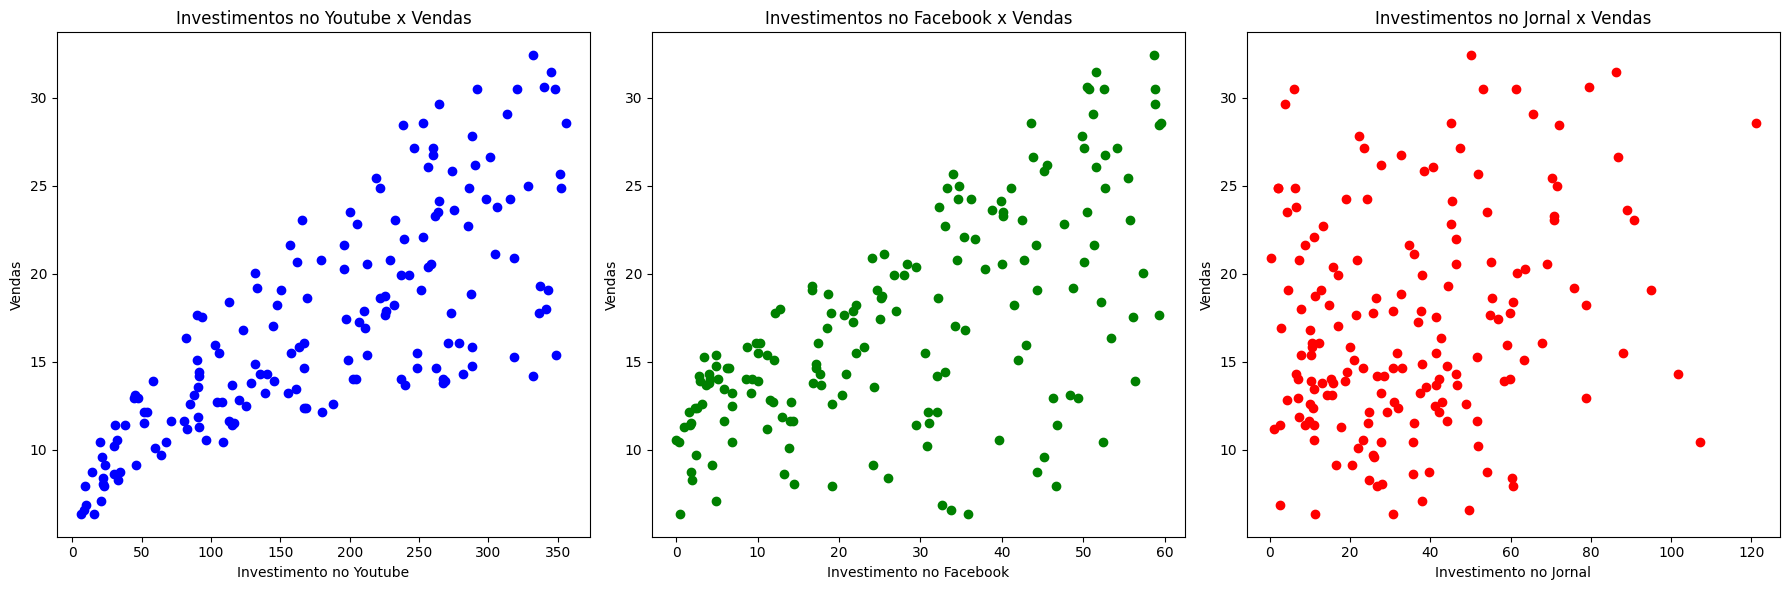

In [87]:
#Revendo o último gráfico
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['youtube'], df['sales'], color='blue')
plt.title('Investimentos no Youtube x Vendas')
plt.xlabel('Investimento no Youtube')
plt.ylabel('Vendas')

plt.subplot(1, 3, 2)
plt.scatter(df['facebook'], df['sales'], color='green')
plt.title('Investimentos no Facebook x Vendas')
plt.xlabel('Investimento no Facebook')
plt.ylabel('Vendas')

plt.subplot(1, 3, 3)
plt.scatter(df['newspaper'], df['sales'], color='red')
plt.title('Investimentos no Jornal x Vendas')
plt.xlabel('Investimento no Jornal')
plt.ylabel('Vendas')

plt.tight_layout()
plt.show()

#Modelagem


#Técnicas de Modelagem
1.Regressão linear do SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

2.Support Vector Regression do SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

3.Decision Tree Regression do XGBoost https://xgboost.readthedocs.io/en/stable/treemethod.html#

Considerações:

##Apenas Variáveis numéricas
---



#TEST DESIGN
Dataset split:
Separação de Train/Test dataset padrão com 20% de massa para teste via método SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#Métrica de avaliação do modelo:
Validação da métrica MSE e RMSE para penalizar grandes erros de previsão.

Utilizando o método do SKLEARN. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [76]:
#Nome dos Investimentos
X = df[["youtube","facebook","newspaper"]]

#Vendas - Target
y = df[["sales"]]

In [88]:
#Criando as variáveis de teste e treino, por fim separando suas proporções
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#TÉCNICA 1. REGRESSÃO LINEAR

In [89]:
#Definindo minha variável de Regressão Linear
regLinear = LinearRegression().fit(X_train,y_train)

In [90]:
#Criando um modelo para predizer a massa de teste
yPredLinear = regLinear.predict(X_test)

#MSE

In [92]:
#Calculando o Mean Squared Error
MSELinear = mean_squared_error(y_test,yPredLinear)

In [93]:
#Encontrando o RMSE (raiz do MSE)
print("MSE Linear:",MSELinear)
print("RMSE Linear:",np.sqrt(MSELinear))

MSE Linear: 5.576790234026713
RMSE Linear: 2.361522863329236


#TÉCNICA 2. SVR

In [ ]:
#Treinando o modelo SVR
regSVR = SVR().fit(X_train,y_train)

In [95]:
#Criando um modelo para predizer a massa de teste
yPredSVR = regSVR.predict(X_test)

#MSE

In [96]:
#Calculando o Mean Squared Error
MSESVR = mean_squared_error(y_test,yPredSVR)

In [97]:
#Encontrando o RMSE (raiz do MSE)
print("MSE SVR:",MSESVR)
print("RMSE SVR:",np.sqrt(MSESVR))

MSE SVR: 7.945113616628386
RMSE SVR: 2.8187077919905756


#TÉCNICA3. Decision Tree Regression (XGBoost)

In [98]:
#Treinando o modelo Decision Tree Regression
regXGB = XGBRegressor().fit(X_train,y_train)

In [99]:
#Criando um modelo para predizer a massa de teste
yPredXGB = regXGB.predict(X_test)

#MSE

In [100]:
#Calculando o Mean Squared Error
MSEXGB = mean_squared_error(y_test,yPredXGB)

In [101]:
#Encontrando o RMSE (raiz do MSE)
print("MSE XGB:",MSEXGB)
print("RMSE XGB:",np.sqrt(MSEXGB))

MSE XGB: 1.1465224826026794
RMSE XGB: 1.070757901022766


#OTIMIZAÇÃO DE HIPERPARAMETROS


Utilizando o método GridSerachCV do SKLEARN

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#Visualizando os parâmetros do modelo XGB
regXGB.get_params().keys()

In [103]:
#Definindo os parâmetros
parameters = {
    #Níveis de decisão para baixo da árvore
    "max_depth": [5, 6, 7],
    #Velocidade que o XGBoost aprende com o Dataset
    "learning_rate": [0.1, 0.2, 0.3],
    #Especificar a task do objetivo que será feito
    "objective": ['reg:squarederror'],
    #Decide qual modelo usar
    "booster": ['gbtree'],
    #Quantidade de threads paralelas para rodar o XGBoost
    "n_jobs": [5],
    #Valor de redução mínima da perda para se criar uma partição dentro de uma folha da árvore
    "gamma": [0, 1],
    #Soma do peso mínimo do nó filho da árvore
    "min_child_weight": [1,3],
    #máximo permitido dentro do peso da árvore
    "max_delta_step": [0,1],
    #porcentagem de sub-amostras no treinamento
    "subsample": [0.5, 1]
}

In [104]:
#Utilizando o GridSearchCV para configurar o modelo com as variações de hiperparâmetros
xgbGrid = GridSearchCV(XGBRegressor(),parameters,refit= 'neg_mean_squared_error',verbose=True)

In [105]:
#Treinando o modelo
xgbGridModel = xgbGrid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [106]:
#Encontrando o melhor parâmetro
xgbGridModel.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_jobs': 5,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [107]:
#Encontrando o melhor parâmetro
yGrid = xgbGridModel.predict(X_test)

In [108]:
#Calculando o Mean Squared Error
MSEGrid = mean_squared_error(y_test,yGrid)

In [109]:
#Encontrando o RMSE (raiz do MSE)
print("MSE SVR:",MSEGrid)
print("RMSE SVR:",np.sqrt(MSEGrid))

MSE SVR: 1.2358319412566683
RMSE SVR: 1.1116797835962784


#Coeficiente de Determinação

In [114]:
r2 = r2_score(y_test,yGrid)
print("Coeficiente de determinação:", r2)

Coeficiente de determinação: 0.9718261126903099
